## Import Library

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import dan periksa data 

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [51]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.shape

(145460, 23)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [63]:
import re
f = ['AliceSprings', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour','Darwin',
     'Hobart', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'NorfolkIsland',
     'Nuriootpa', 'Perth', 'PerthAirport', 'Portland', 'Sale', 'Sydney', 'SydneyAirport','Townsville',
     'WaggaWagga', 'Watsonia', 'Williamtown', 'Woomera']

for x in sorted(df1.Location.unique().astype(str)):
    if x in f:
        up = re.findall('[A-Z][^A-Z]*', x)
        print('<option value="'+str(x)+'">'+" ".join(up)+'</option>')

<option value="AliceSprings">Alice Springs</option>
<option value="Brisbane">Brisbane</option>
<option value="Cairns">Cairns</option>
<option value="Canberra">Canberra</option>
<option value="Cobar">Cobar</option>
<option value="CoffsHarbour">Coffs Harbour</option>
<option value="Darwin">Darwin</option>
<option value="Hobart">Hobart</option>
<option value="Melbourne">Melbourne</option>
<option value="MelbourneAirport">Melbourne Airport</option>
<option value="Mildura">Mildura</option>
<option value="Moree">Moree</option>
<option value="MountGambier">Mount Gambier</option>
<option value="NorfolkIsland">Norfolk Island</option>
<option value="Nuriootpa">Nuriootpa</option>
<option value="Perth">Perth</option>
<option value="PerthAirport">Perth Airport</option>
<option value="Portland">Portland</option>
<option value="Sale">Sale</option>
<option value="Sydney">Sydney</option>
<option value="SydneyAirport">Sydney Airport</option>
<option value="Townsville">Townsville</option>
<option value="

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Penjelasan Kolom pada Dataset
1. Date :
   Tanggal bulan, dan tahun data tersebut diambil
2. Location :
   Tempat data tersebut diambil
3. MinTemp :
   Minimum Suhu dalam 24 jam (C)
4. MaxTemp :
   Maksimal Suhu dalam 24 jam (C)
5. Rainfall :
   Jumlah Curah hujan dalam 24 jam(mililiter)
6. Evaporation :
   Penguapan dalam 24 jam (militer)
7. Sunshine :
   Lama matahari bersinar (jam)
8. WindGustDir :
   Arah hembusan angin terkuat dalam 24 jam (16 arah mata angin)
9. WindGustSpeed :
   Kecepatan hembusan angin terkuat dalam 24 jam (km/j)
10. WindDir9am :
  Arah hembusan angin pada jam 9 pagi (16 arah mata angin)
11. WindDir3pm :
  Arah hembusan angin pada jam 3 sore (16 arah mata angin)
12. WindSpeed9am :
  Kecepatan hembusan angin pada jam 9 pagi (km/j)
13. WindSpeed3pm :
  Kecepatan hembusan angin pada jam 3 sore (km/j)
14. Humidity9am :
  Kelembaban pada jam 9 pagi (persen)
15. Humidity3pm :
  Kelembaban pada jam 3 sore (persen)
16. Pressure9am :
  Tekanan atmosfir pada jam 9 pagi (hpa/hectopascal)
17. Pressure3pm :
  Tekanan atmosfir pada jam 3 sore (hpa/hectopascal)
18. Cloud9am :
  nilai tutupan awan/ cloud cover pada jam 9 pagi (oktas)
19. Cloud3pm :
  nilai tutupan awan/ cloud cover pada jam 3 sore (oktas)
20. Temp9am :
  Suhu pada jam 9 pagi (C)
21. Temp3pm :
  Suhu pada jam 3 sore (C)

In [6]:
df = df.drop(['Date'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [9]:
round(df.isnull().sum()/len(df)*100, 2)

Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

## Menangani Data yang Hilang

In [10]:
df = df.dropna(how = 'any')

In [11]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Ubah RainToday dan RainTomorrow menjadi numerical

In [12]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [13]:
df.shape

(56420, 22)

## Univariate, Bivariate dan Multivariate

In [14]:
numerical_cols = df.columns[df.dtypes != object][:-2]
categorical_cols = df.columns[df.dtypes == object]

In [16]:
print(numerical_cols)
print(categorical_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


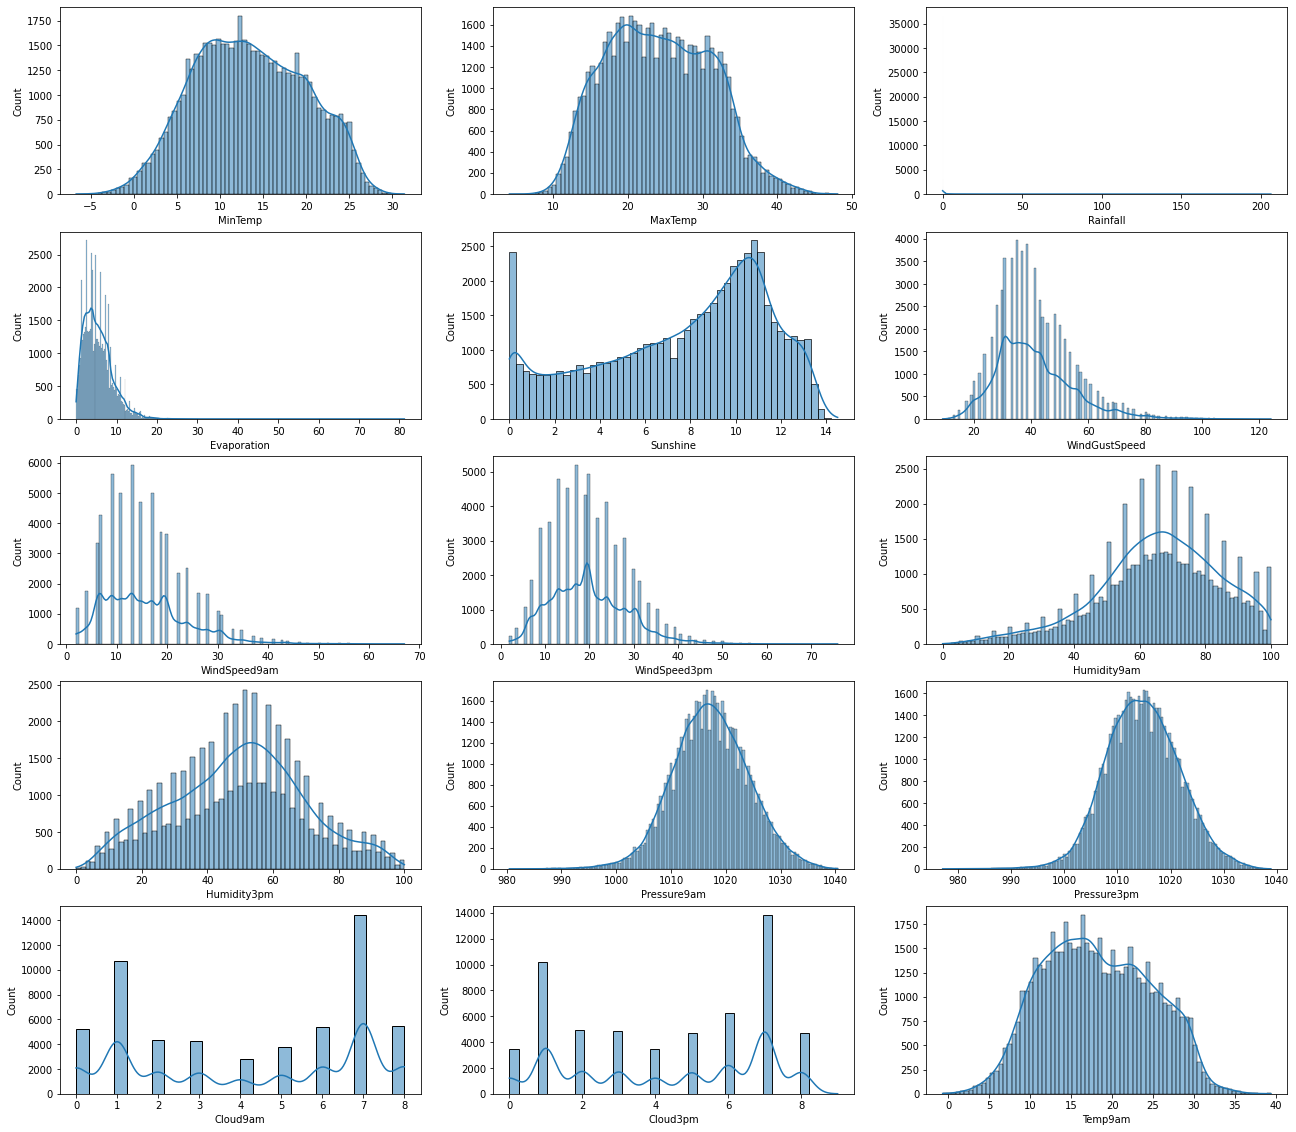

In [17]:
col = 3
row = len(numerical_cols)//col

fig, axs = plt.subplots(row, col, figsize=(22, 20))
idx = 0
for a in range(row):
  for b in range(col):
    sns.histplot(x = numerical_cols[idx], data = df, ax = axs[a, b], kde = True)
    idx +=1
    if idx == len(numerical_cols):
      break
    
plt.show()

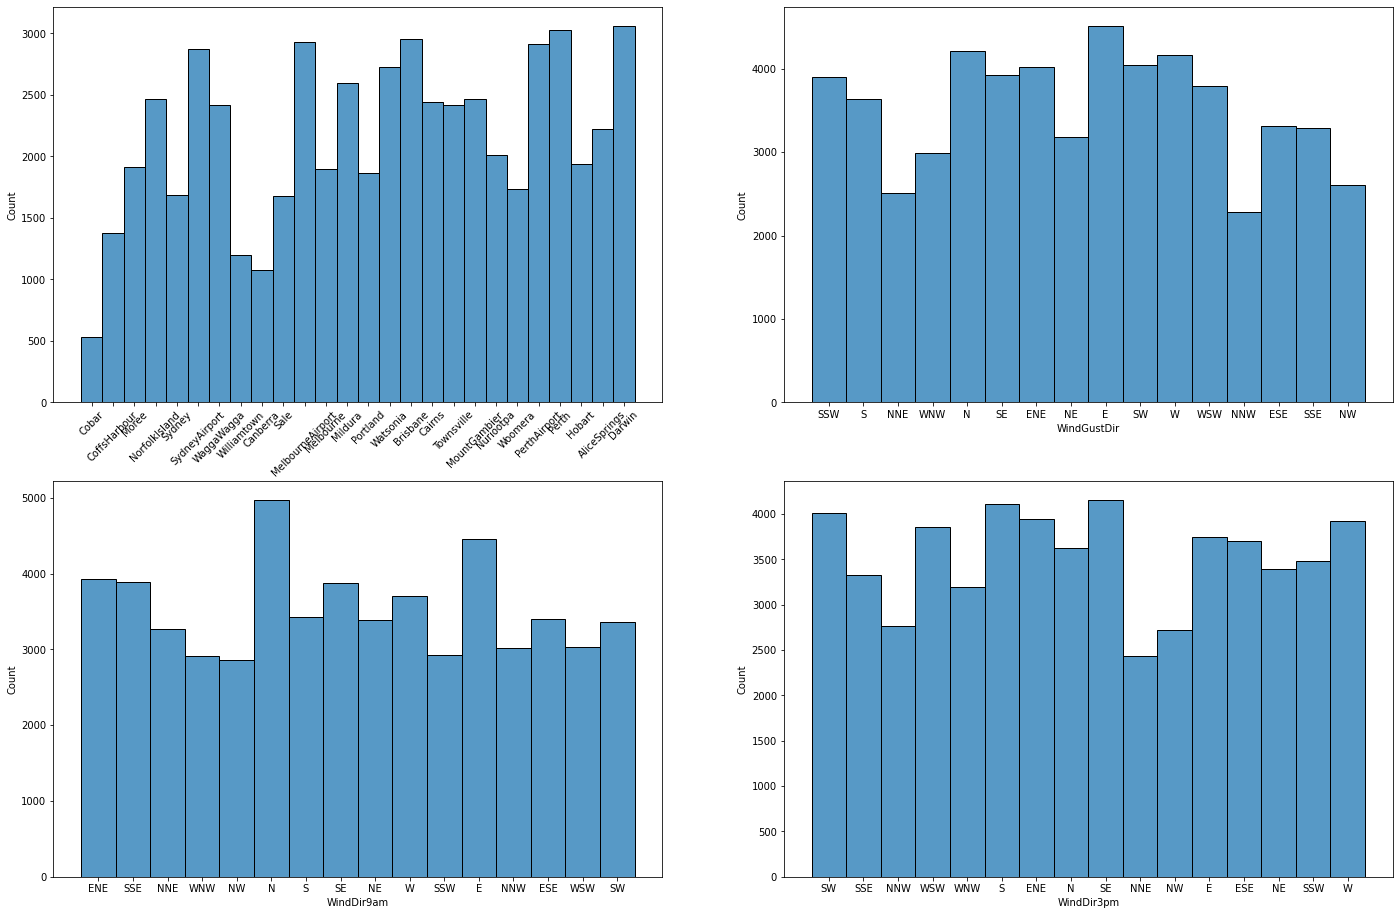

In [18]:
col = 2
row = len(categorical_cols)//col

fig, axs = plt.subplots(row, col, figsize=(24, 16))
idx = 0
for a in range(row):
  for b in range(col):
    sns.histplot(x = categorical_cols[idx], data = df, ax = axs[a, b])
    if categorical_cols[idx] == 'Location':
      axs[a, b].set_xticklabels(df[categorical_cols[idx]].unique(), rotation=45)
    idx +=1
    if idx == len(categorical_cols):
      break
    
plt.show()

In [19]:
# test = df.groupby('Cloud9am').agg(over=pd.NamedAgg(column='Cloud9am', aggfunc=lambda x: (x > 3).sum()), 
#                                                   under=pd.NamedAgg(column='Cloud9am', aggfunc=lambda x: (x <6).sum())).reset_index()

# range = [min(df.Cloud9am), 5, 7, max(df.Cloud9am)]
# df_cloud = df.groupby(pd.cut(df.Cloud9am, range)).count()
# print(df_cloud['RainTomorrow'])

# group_df = df.groupby(['Cloud9am', 'RainTomorrow']).agg(
#   count=pd.NamedAgg(column="RainTomorrow", aggfunc="count")
# )
# group_df['percentage'] = group_df.groupby('RainTomorrow')['count'].apply(lambda x: round(x/x.sum()*100, 2))
# print(group_df)

# dicts = [['<3', ]]

# reviews.groupby('business_id')\
#        .agg(over=pandas.NamedAgg(column='stars', aggfunc=lambda x: (x > 3).sum()), 
#             under=pandas.NamedAgg(column='stars', aggfunc=lambda x: (x < 3).sum()))\
#        .reset_index()

In [20]:
group_df = df.groupby(['RainToday', 'RainTomorrow']).agg(
  count=pd.NamedAgg(column="RainTomorrow", aggfunc="count")
)
group_df['percentage'] = group_df.groupby('RainTomorrow')['count'].apply(lambda x: round(x/x.sum()*100, 2))
group_df

count  percentage
RainToday RainTomorrow                   
0         0             37274       84.73
          1              6684       53.79
1         0              6719       15.27
          1              5743       46.21

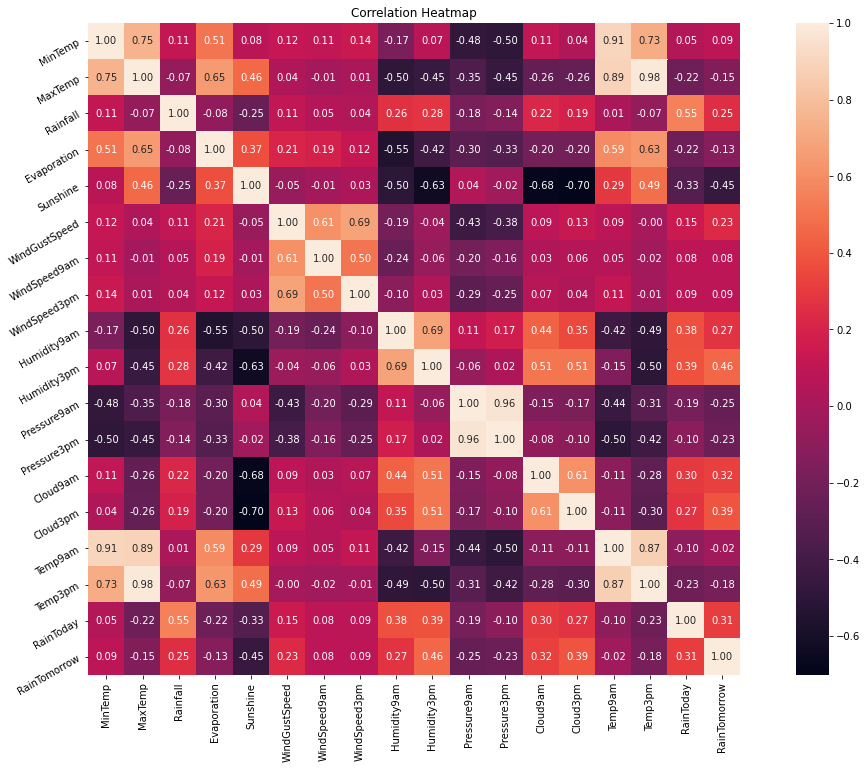

In [21]:
plt.figure(figsize=(20,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

kesimpulan dari heatmap diatas
1. variable MinTemp dan MaxTemp mempunyai korelasi positif tinggi dengan correlation coefficient = 0.74. 
2. variable MinTemp and Temp3pm mempunyai korelasi positif tinggi dengan correlation coefficient = 0.71.
3. variable MinTemp and Temp9am mempunyai korelasi positif tinggi dengan correlation coefficient = 0.90.
4. variable MaxTemp and Temp9am mempunyai korelasi positif tinggi dengan correlation coefficient = 0.89.
5. variable MaxTemp and Temp3pm mempunyai korelasi positif tinggi dengan correlation coefficient = 0.98.
6. variable WindGustSpeed and WindSpeed3pm mempunyai korelasi positif tinggi dengan correlation coefficient = 0.69.
7. variable Pressure9am and Pressure3pm mempunyai korelasi positif tinggi dengan correlation coefficient = 0.96.
8. variable Temp9am and Temp3pm mempunyai korelasi positif tinggi dengan correlation coefficient = 0.86.

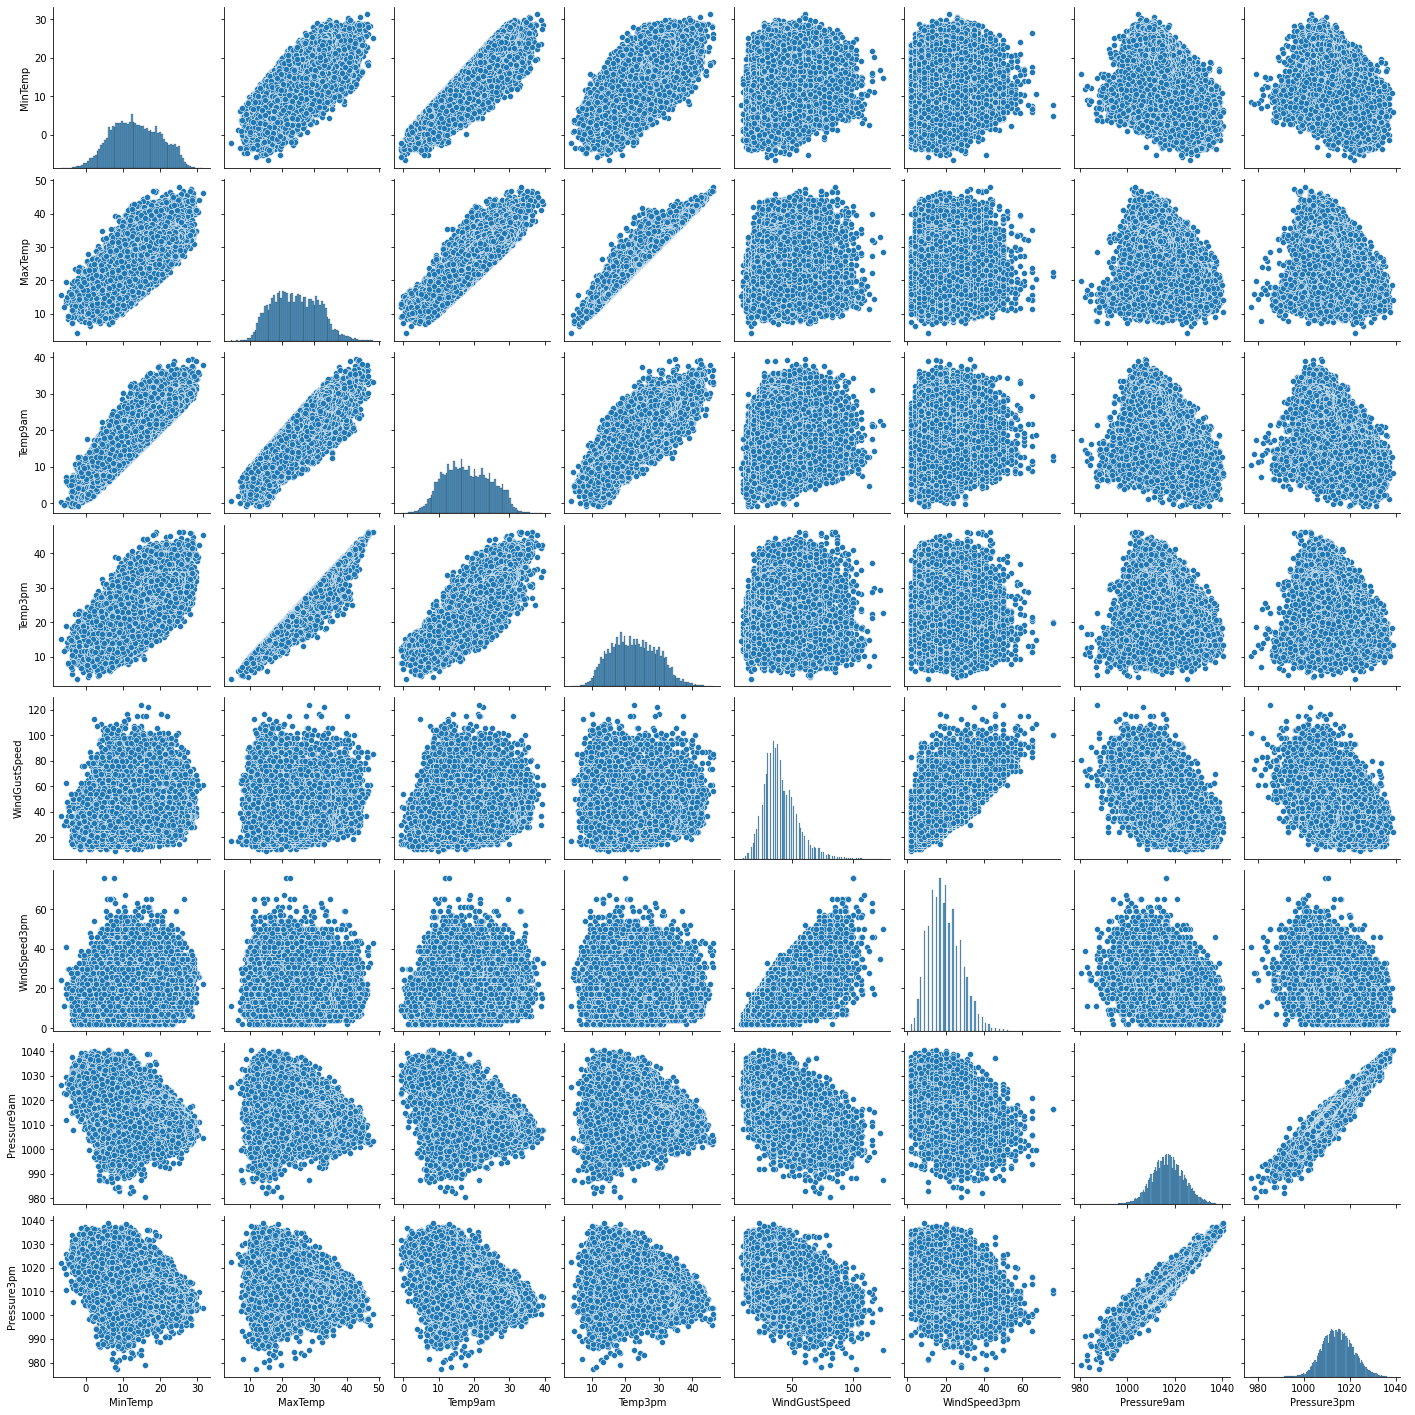

In [22]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## Menangani Categorical Data

In [23]:
df = pd.get_dummies(data = df, columns=categorical_cols)

## Scalling Data

In [24]:
features = df.copy()
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features.loc[:, ~features.columns.isin(['RainTomorrow', 'RainToday'])] = s_scaler.fit_transform(features.loc[:, ~features.columns.isin(['RainTomorrow', 'RainToday'])])
features = pd.DataFrame(features, columns=col_names)

## Menangani data outlier

In [25]:
features[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,56420.0,-2.987476e-15,1.000009,-3.142579,-0.758150,-0.041263,0.769131,2.795116
MaxTemp,56420.0,1.038305e-15,1.000009,-2.886289,-0.791782,-0.045793,0.786271,3.425924
Rainfall,56420.0,-6.370165e-16,1.000009,-0.303702,-0.303702,-0.303702,-0.218168,29.091459
Evaporation,56420.0,-2.374963e-15,1.000009,-1.488843,-0.731318,-0.136121,0.513186,20.479371
Sunshine,56420.0,5.808875e-16,1.000009,-2.058376,-0.727924,0.230002,0.788792,1.799936
WindGustSpeed,56420.0,-1.100109e-15,1.000009,-2.390483,-0.740704,-0.140784,0.534126,6.233365
WindSpeed9am,56420.0,-4.031930e-16,1.000009,-1.643302,-0.801645,-0.080225,0.520958,6.172081
WindSpeed3pm,56420.0,2.601275e-15,1.000009,-2.090077,-0.797496,-0.092452,0.730099,6.605467
Humidity9am,56420.0,4.438008e-15,1.000009,-3.558239,-0.587374,0.060815,0.709004,1.843334
Humidity3pm,56420.0,-4.055994e-16,1.000009,-2.455925,-0.722983,0.019707,0.663371,2.495339


In [26]:
# plt.figure(figsize=(15,10))
# cols = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

# for i in range(len(cols)):
#   plt.subplot(2, 3, i+1)
#   fig = features.boxplot(column=cols[i])
#   fig.set_title('boxplot '+str(cols[i]))
#   fig.set_ylabel(cols[i])

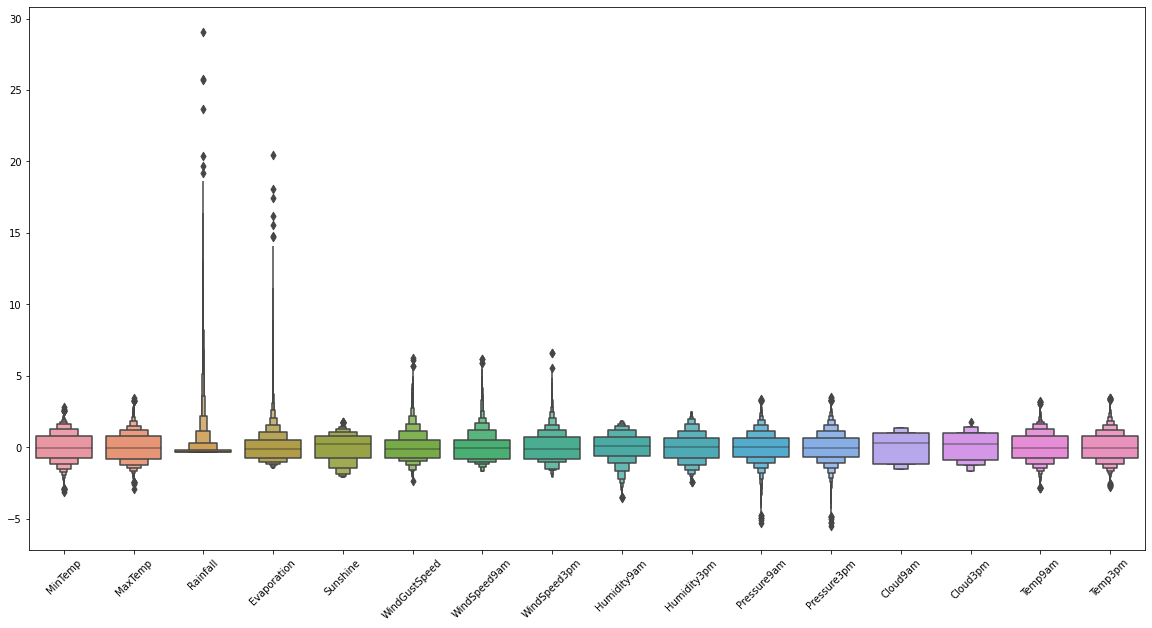

In [27]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
def outlier_plot(features):
  plt.figure(figsize=(20,10))
  sns.boxenplot(data = features)
  plt.xticks(rotation=45)
  plt.show()

outlier_plot(features[numerical_cols])

In [28]:
# plt.figure(figsize=(15,10))

# cols = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

# for i in range(len(cols)):
#   plt.subplot(2, 3, i+1)
#   fig = features[col[i]].hist(bins=10)
#   fig.set_xlabel(col[i])
#   fig.set_ylabel('RainTomorrow')

In [29]:
IQR = features.Rainfall.quantile(0.75) - features.Rainfall.quantile(0.25)
Lower_fence = features.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = features.Rainfall.quantile(0.75) + (IQR * 3)
print('nilai outlier dari Rainfall  < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=round(Lower_fence, 2), upperboundary=round(Upper_fence,2)))

features = features[(features['Rainfall'].values > Lower_fence) & (features['Rainfall'].values < Upper_fence)]

nilai outlier dari Rainfall  < -0.56 atau > 0.04


In [30]:
IQR = features.Evaporation.quantile(0.75) - features.Evaporation.quantile(0.25)
Lower_fence = features.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = features.Evaporation.quantile(0.75) + (IQR * 3)
print('nilai outlier dari Evaporation < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=round(Lower_fence, 2), upperboundary=round(Upper_fence,2)))

features = features[(features['Evaporation'].values > Lower_fence) & (features['Evaporation'].values < Upper_fence)]

nilai outlier dari Evaporation < -4.57 atau > 4.52


In [31]:
IQR = features.WindSpeed9am.quantile(0.75) - features.WindSpeed9am.quantile(0.25)
Lower_fence = features.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = features.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('nilai outlier dari WindSpeed9am < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=round(Lower_fence, 2), upperboundary=round(Upper_fence,2)))

features = features[(features['WindSpeed9am'].values > Lower_fence) & (features['WindSpeed9am'].values < Upper_fence)]

nilai outlier dari WindSpeed9am < -4.77 atau > 4.49


In [32]:
IQR = features.WindSpeed3pm.quantile(0.75) - features.WindSpeed3pm.quantile(0.25)
Lower_fence = features.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = features.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('nilai outlier dari WindSpeed3pm < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=round(Lower_fence, 2), upperboundary=round(Upper_fence,2)))

features = features[(features['WindSpeed3pm'].values > Lower_fence) & (features['WindSpeed3pm'].values < Upper_fence)]

nilai outlier dari WindSpeed3pm < -4.68 atau > 4.37


In [33]:
IQR = features.Pressure3pm.quantile(0.75) - features.Pressure3pm.quantile(0.25)
Lower_fence = features.Pressure3pm.quantile(0.25) - (IQR * 3)
Upper_fence = features.Pressure3pm.quantile(0.75) + (IQR * 3)
print('nilai outlier dari Pressure3pm < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=round(Lower_fence, 2), upperboundary=round(Upper_fence,2)))

features = features[(features['Pressure3pm'].values > Lower_fence) & (features['Pressure3pm'].values < Upper_fence)]

nilai outlier dari Pressure3pm < -4.58 atau > 4.69


In [34]:
IQR = features.Pressure9am.quantile(0.75) - features.Pressure9am.quantile(0.25)
Lower_fence = features.Pressure9am.quantile(0.25) - (IQR * 3)
Upper_fence = features.Pressure9am.quantile(0.75) + (IQR * 3)
print('nilai outlier dari Pressure9am < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=round(Lower_fence, 2), upperboundary=round(Upper_fence,2)))

features = features[(features['Pressure9am'].values > Lower_fence) & (features['Pressure9am'].values < Upper_fence)]

nilai outlier dari Pressure9am < -4.42 atau > 4.6


In [35]:
features.shape

(47045, 92)

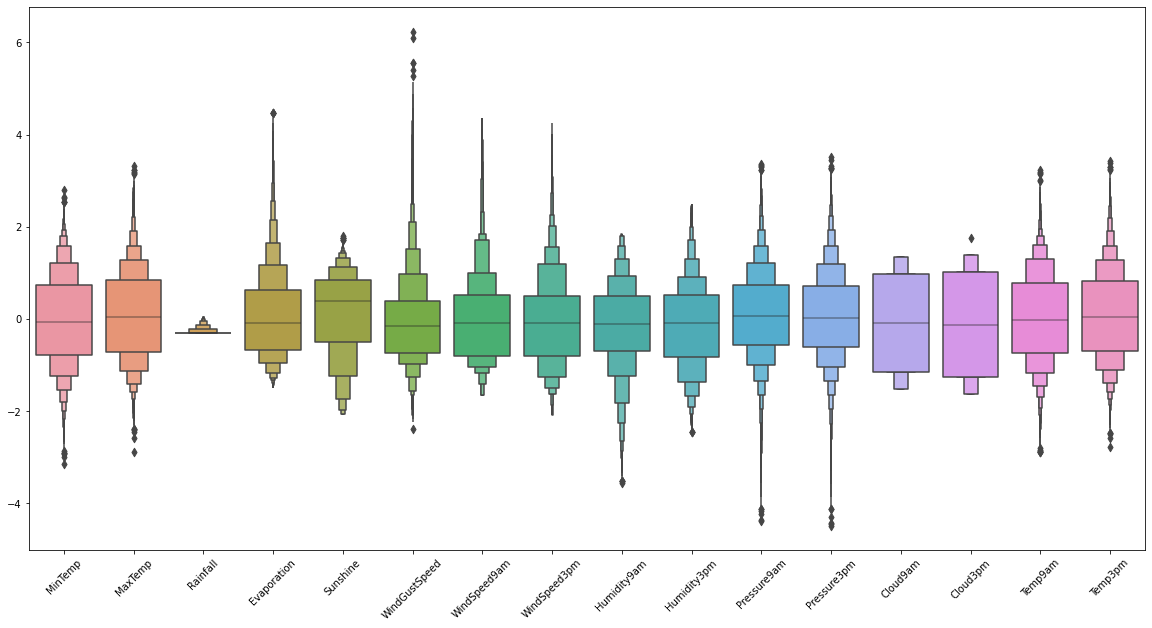

In [36]:
outlier_plot(features[numerical_cols])

## Downsampling dataset

<AxesSubplot:ylabel='RainTomorrow'>

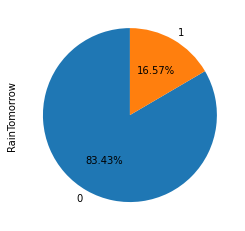

In [37]:
features['RainTomorrow'].value_counts().plot.pie(autopct='%.2f%%', startangle=90)

<AxesSubplot:ylabel='RainTomorrow'>

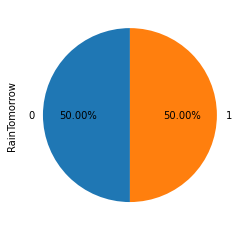

In [38]:
no = features[features.RainTomorrow == 0]
yes = features[features.RainTomorrow == 1]
no_downsampled = resample(no, replace=True, n_samples=len(yes), random_state=42)
downsampled = pd.concat([yes, no_downsampled])

downsampled.RainTomorrow.value_counts().plot.pie(autopct='%.2f%%', startangle=90)

In [39]:
downsampled.shape

(15590, 92)

### Model Training

In [40]:
X = downsampled.drop(['RainTomorrow'], axis = 1)
y = downsampled['RainTomorrow']

In [41]:
X.shape

(15590, 91)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
for x in x_train.columns:
    print(x)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
Location_AliceSprings
Location_Brisbane
Location_Cairns
Location_Canberra
Location_Cobar
Location_CoffsHarbour
Location_Darwin
Location_Hobart
Location_Melbourne
Location_MelbourneAirport
Location_Mildura
Location_Moree
Location_MountGambier
Location_NorfolkIsland
Location_Nuriootpa
Location_Perth
Location_PerthAirport
Location_Portland
Location_Sale
Location_Sydney
Location_SydneyAirport
Location_Townsville
Location_WaggaWagga
Location_Watsonia
Location_Williamtown
Location_Woomera
WindGustDir_E
WindGustDir_ENE
WindGustDir_ESE
WindGustDir_N
WindGustDir_NE
WindGustDir_NNE
WindGustDir_NNW
WindGustDir_NW
WindGustDir_S
WindGustDir_SE
WindGustDir_SSE
WindGustDir_SSW
WindGustDir_SW
WindGustDir_W
WindGustDir_WNW
WindGustDir_WSW
WindDir9am_E
WindDir9am_ENE
WindDir9am_ESE
WindDir9am_N
WindDir9am_NE
WindDir9am_NNE
WindD

In [54]:
model = RandomForestRegressor(n_estimators = 100)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  81.30211674150097 %


In [55]:
cm = confusion_matrix(y_test, predicted.round())

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP)\t= ', TP)
print('True Negatives(TN)\t= ', TN)
print('False Positives(FP)\t= ', FP)
print('False Negatives(FN)\t= ', FN)

Confusion matrix

 [[1270  304]
 [ 279 1265]]

True Positives(TP)	=  1270
True Negatives(TN)	=  1265
False Positives(FP)	=  304
False Negatives(FN)	=  279


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

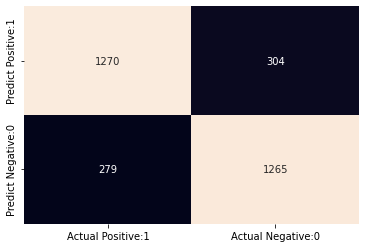

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cbar=False)
plt.yticks(rotation=90, va="center")

In [57]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1574
           1       0.81      0.82      0.81      1544

    accuracy                           0.81      3118
   macro avg       0.81      0.81      0.81      3118
weighted avg       0.81      0.81      0.81      3118



In [94]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall atau Sensitivity : {0:0.4f}'.format(recall))

Classification accuracy : 0.9234
Classification error : 0.0766
Precision : 0.9277
Recall atau Sensitivity : 0.9207


In [62]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=42, shuffle=False)
scores = cross_val_score(model, x_train, y_train, cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.463


In [69]:
scores

array([0.43832481, 0.48568878, 0.45262727, 0.46650979, 0.44303992,
       0.46371556, 0.47181909, 0.47656907, 0.47831432, 0.45612123])

## SMOTE

In [84]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X = features.drop(['RainTomorrow'], axis = 1)
y = features['RainTomorrow']

X, y = oversample.fit_resample(X, y)

In [85]:
X.shape

(78500, 91)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model = RandomForestRegressor(n_estimators = 100)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  92.34394904458598 %


In [88]:
cm = confusion_matrix(y_test, predicted.round())

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP)\t= ', TP)
print('True Negatives(TN)\t= ', TN)
print('False Positives(FP)\t= ', FP)
print('False Negatives(FN)\t= ', FN)

Confusion matrix

 [[7331  571]
 [ 631 7167]]

True Positives(TP)	=  7331
True Negatives(TN)	=  7167
False Positives(FP)	=  571
False Negatives(FN)	=  631


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

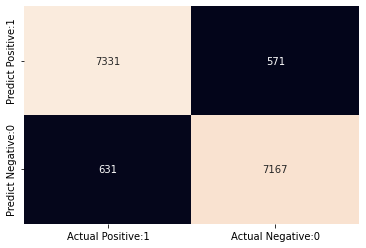

In [89]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cbar=False)
plt.yticks(rotation=90, va="center")

In [90]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7902
           1       0.93      0.92      0.92      7798

    accuracy                           0.92     15700
   macro avg       0.92      0.92      0.92     15700
weighted avg       0.92      0.92      0.92     15700



In [91]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall atau Sensitivity : {0:0.4f}'.format(recall))

Classification accuracy : 0.9234
Classification error : 0.0766
Precision : 0.9277
Recall atau Sensitivity : 0.9207


In [92]:
cv = KFold(n_splits=10, random_state=42, shuffle=False)
scores = cross_val_score(model, x_train, y_train, cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.745


In [93]:
scores

array([0.75119498, 0.76036728, 0.7441644 , 0.72931583, 0.74786696,
       0.76501867, 0.7460446 , 0.73160138, 0.73638601, 0.73721573])